# Introduction

This project combines a fine-tuned Gemma language model (via LoRA) for personalized crop recommendations with a multimodal system for real-time leaf disease detection, providing audio feedback to assist diverse farming communities.

## Motivation
- Agriculture is the backbone of many economies, yet sometimes farmers often lack access to timely, accurate insights on crop selection and plant health.
- This assistant that helps farmers choose optimal crops based on soil conditions and detect any unknown leaf diseases.

In [1]:
!pip install unsloth

!pip install --no-deps --upgrade transformers
!pip install --no-deps --upgrade timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.8/299.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.6/504.6 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.7/166.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.7/155.7 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.

In [2]:
from unsloth import FastModel
import torch
import os

fourbit_models = [
    # 4bit dynamic quants for superior accuracy and low memory use
    "unsloth/gemma-3n-E4B-it-unsloth-bnb-4bit",
    "unsloth/gemma-3n-E2B-it-unsloth-bnb-4bit",
    "unsloth/gemma-3n-E4B-unsloth-bnb-4bit",
    "unsloth/gemma-3n-E2B-unsloth-bnb-4bit",
    "unsloth/gemma-3-1b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-4b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-12b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-27b-it-unsloth-bnb-4bit",
] 

model, tokenizer = FastModel.from_pretrained(
    model_name = "unsloth/gemma-3n-E4B-it",
    dtype = None, 
    max_seq_length = 1024, 
    load_in_4bit = True,  
    full_finetuning = False
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


2025-08-05 16:00:15.237735: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754409615.484223      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754409615.552073      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.8.1: Fast Gemma3N patching. Transformers: 4.54.1.
   \\   /|    Tesla T4. Num GPUs = 2. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.1+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.3.1
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.31.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Gemma3N does not support SDPA - switching to eager!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/3.72G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.15G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/98.0 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

preprocessor_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/4.70M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

# Inference Pipeline

In [3]:
from transformers import TextStreamer
import gc

def do_gemma_3n_inference(model, tokenizer, messages, max_new_tokens = 128):
    
    inputs = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt = True, 
        tokenize = True,
        return_dict = True,
        return_tensors = "pt",
    ).to("cuda")
    
    output_ids = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        temperature=1.0,
        top_p=0.95,
        top_k=64,
        do_sample=True
    )

    generated_text = tokenizer.decode(
        output_ids[0][inputs['input_ids'].shape[-1]:], 
        skip_special_tokens=True
    )
    
    # Cleanup to reduce VRAM usage
    del inputs
    torch.cuda.empty_cache()
    gc.collect()

    return generated_text

In [4]:
import torch
import gc

import torch._dynamo
torch._dynamo.config.suppress_errors = True
torch._dynamo.config.cache_size_limit = 512

# Crop Recommendation

Fine-tuning the Gemma 3n model on Crop-Recommendation dataset after changing the tabular data to the required format.

## Data preparation

In [5]:
import pandas as pd
df = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
import json

formatted_data = []
for _, row in df.iterrows():
    prompt = (
        f"N: {row['N']}, P: {row['P']}, K: {row['K']}, temperature: {row['temperature']:.2f}, "
        f"humidity: {row['humidity']:.2f}, pH: {row['ph']:.2f}, rainfall: {row['rainfall']:.2f}"
    )
    response = f"Recommended crop: {row['label']}"
    formatted_data.append({"prompt": prompt, "response": response})

# Save as JSONL for unsloth
with open("crop_recommendation_train.jsonl", "w") as f:
    for item in formatted_data:
        f.write(json.dumps(item) + "\n")

In [7]:
from datasets import load_dataset

my_text_dataset = load_dataset("json", data_files="/kaggle/working/crop_recommendation_train.jsonl")["train"]


Generating train split: 0 examples [00:00, ? examples/s]

In [8]:
print(my_text_dataset[0])

{'prompt': 'N: 90, P: 42, K: 43, temperature: 20.88, humidity: 82.00, pH: 6.50, rainfall: 202.94', 'response': 'Recommended crop: rice'}


In [9]:
def formatting_prompts_func(examples):
    prompts = examples["prompt"]
    responses = examples["response"]
    texts = [
        tokenizer.apply_chat_template(
            [{"role": "user", "content": p}, {"role": "assistant", "content": r}],
            tokenize=False,
            add_generation_prompt=False
        ).removeprefix("<bos>")
        for p, r in zip(prompts, responses)
    ]
    return { "text": texts }


In [10]:
dataset = my_text_dataset.map(formatting_prompts_func, batched=True)

Map:   0%|          | 0/2200 [00:00<?, ? examples/s]

## Training

In [11]:

model = FastModel.get_peft_model(
    model,
    finetune_vision_layers     = False, # Turn off for just text!
    finetune_language_layers   = True,  # Should leave on!
    finetune_attention_modules = True,  # Attention good for GRPO
    finetune_mlp_modules       = True,  # Should leave on always!

    r = 8,           # Larger = higher accuracy, but might overfit
    lora_alpha = 8,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
)

Unsloth: Making `model.base_model.model.model.language_model` require gradients


In [12]:
from trl import SFTTrainer, SFTConfig

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=dataset,
    args = SFTConfig(
        dataset_text_field = "text",
        per_device_train_batch_size = 1,
        gradient_accumulation_steps = 4, # Use GA to mimic batch size!
        warmup_steps = 5,
        # num_train_epochs = 1, # Set this for 1 full training run.
        max_steps = 60,
        learning_rate = 2e-4, # Reduce to 2e-5 for long training runs
        logging_steps = 1,
        optim = "paged_adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        report_to = "none", # Use this for WandB etc
    ),
)

trainer.train()

Unsloth: Tokenizing ["text"] (num_proc=2):   0%|          | 0/2200 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,200 | Num Epochs = 1 | Total steps = 60
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 19,210,240 of 7,869,188,432 (0.24% trained)
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,8.763600
2,8.940500
3,8.647300
4,8.922700
5,8.983100
6,9.145700
7,9.158000
8,8.994400
9,8.986700
10,8.926000


TrainOutput(global_step=60, training_loss=3.2324332078297933, metrics={'train_runtime': 421.047, 'train_samples_per_second': 1.14, 'train_steps_per_second': 0.143, 'total_flos': 982055527704000.0, 'train_loss': 3.2324332078297933})

## Example

In [13]:
from unsloth.chat_templates import get_chat_template

messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": "You are a helpful assistant that recommends crops based on soil and climate."}]
    },
    {
        "role": "user",
        "content": [{"type": "text", "text": "N: 80, P: 38, K: 67, temperature: 32.01, humidity: 58, pH: 6.90, rainfall: 302.93"}]
    }
]

inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True, 
    return_tensors = "pt",
    tokenize = True,
    return_dict = True,
).to("cuda")
outputs = model.generate(
    **inputs,
    max_new_tokens = 512, 
    # Recommended Gemma-3 settings!
    temperature = 1.0, top_p = 0.95, top_k = 64,
)
tokenizer.batch_decode(outputs)

["<bos><start_of_turn>user\nYou are a helpful assistant that recommends crops based on soil and climate.\n\nN: 80, P: 38, K: 67, temperature: 32.01, humidity: 58, pH: 6.90, rainfall: 302.93<end_of_turn>\n<start_of_turn>model\nOkay, based on the provided data (N: 80, P: 38, K: 67, temperature: 32.01, humidity: 58, pH: 6.90, rainfall: 302.93), here are some crop recommendations. I'll break it down by considering the soil nutrient levels, climate, and pH.\n\n**Analysis of the Data:**\n\n*   **Soil Nutrients:** The NPK values (80, 38, 67) suggest relatively good levels of Nitrogen, moderate Phosphorus, and good Potassium.  Nitrogen is particularly high, which is a positive.\n*   **Temperature:** 32.01° (approximately 90.6°F) is warm, suitable for many warm-season crops.\n*   **Humidity:** 58% is moderate. It's not excessively dry or wet.\n*   **pH:** 6.90 is slightly alkaline. This is generally suitable for many crops, but some prefer slightly more acidic conditions.\n*   **Rainfall:** 302

In [14]:
messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": "You are a helpful assistant that recommends crops based on soil and climate."}]
    },
    {
        "role": "user",
        "content": [{"type": "text", "text": "N: 80, P: 38, K: 67, temperature: 32.01, humidity: 58, pH: 6.90, rainfall: 302.93"}]
    }
]
inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True, 
    return_tensors = "pt",
    tokenize = True,
    return_dict = True,
).to("cuda")

from transformers import TextStreamer
_ = model.generate(
    **inputs,
    max_new_tokens = 1024, 
    temperature = 1.0, top_p = 0.95, top_k = 64,
    streamer = TextStreamer(tokenizer, skip_prompt = True),
)

Okay, based on the provided soil (N: 80, P: 38, K: 67), climate (temperature: 32.01, humidity: 58, rainfall: 302.93), and pH (6.90), here are some crop recommendations.  I'll break it down into categories and explain my reasoning.

**Overall Assessment:**

*   **Moderate Nutrient Levels:** The NPK values suggest moderately fertile soil. Nitrogen is a bit high, which could indicate a history of fertilization or a naturally fertile area. Phosphorus is somewhat low, and Potassium is good.
*   **Warm Climate:** A temperature of 32.01°C indicates a warm climate suitable for a wide range of crops.
*   **Moderate Humidity:** 58% humidity is generally manageable, but it's important to consider seasonal variations.
*   **Slightly Alkaline pH:** A pH of 6.90 is slightly alkaline. This is good for many crops, but some plants prefer slightly more acidic conditions.
*   **Adequate Rainfall:** 302.93 mm of rainfall is sufficient for many crops, but water management (irrigation) might be needed durin

# Crop Disease Detection

Giving the image of leaf which is infected as an input to get the reason of disease and diagnosis as either text or audio including local languages. (Making it easy for local farmers to use the model)

## Text output, Image/Text input

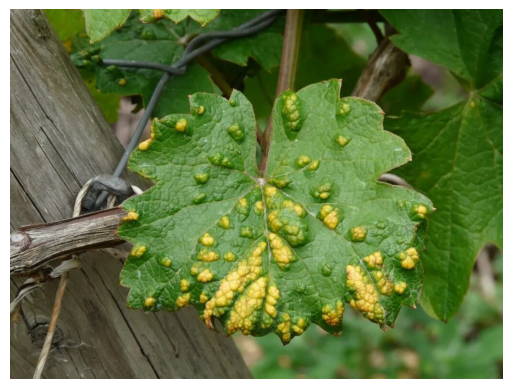

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

image = "/kaggle/input/leaf-photo/leaf1.jpg"

img = Image.open(image)

plt.imshow(img)
plt.axis('off')  
plt.show()

In [16]:
messages = [
        {
    "role": "system",
    "content": [{ "type" : "text",
                  "text" : "Answer briefly, be laconic if possible." }]
    },
    {
    "role": "user",
    "content": [{ "type" : "text",
                  "text" : "Who is Lord Krishna?" }]
}]
output = do_gemma_3n_inference(model, tokenizer, messages, max_new_tokens = 64)
print(output)

A major deity in Hinduism, revered as an avatar (incarnation) of Vishnu. Known for wisdom, compassion, and playful divine nature.



In [17]:
import numpy as np
from time import time
def run_query(user_input, max_new_tokens=128, model=model, tokenizer=tokenizer):
    _start = time()
    messages = [
        {
    "role": "system",
    "content": [{ "type" : "text",
                  "text" : "Answer briefly, be laconic if possible." }]
    },
    {
    "role": "user",
    "content": [{ "type" : "text",
                  "text" : user_input }]
    }]
    output = do_gemma_3n_inference(model, tokenizer, messages, max_new_tokens = max_new_tokens)
    display(output)

In [18]:
run_query("Who is Narendra Modi?", max_new_tokens=16)

'Current Prime Minister of India (since 2014). Leader of the'

In [19]:
from IPython.display import display, Markdown
import numpy as np
from time import time

def colorize_text(text):
    for word, color in zip(["Question", "Answer"], ["red", "green"]):
        text = text.replace(f"{word}:", f"\n\n**<font color='{color}'>{word}:</font>**")
    return text

# Run query for image + text input
def run_image_query(image_path, question_text, max_new_tokens=128, model=model, tokenizer=tokenizer):
    start = time()

    messages = [
        {
            "role": "system",
            "content": [
                {"type": "text", "text": "Answer briefly, be laconic if possible."}
            ]
        },
        {
            "role": "user",
            "content": [
                {"type": "image", "image": image_path},
                {"type": "text", "text": question_text}
            ]
        }
    ]

    output = do_gemma_3n_inference(model, tokenizer, messages, max_new_tokens=max_new_tokens)

    end = time()
    elapsed = np.round(end - start, 2)

    formatted_output = f"Answer: {output}."
    display(Markdown(colorize_text(formatted_output)))

# Example usage:
image_path = "/kaggle/input/leaf-photo/leaf1.jpg"

In [20]:
run_image_query(image_path, "What leaf is this? What disease does this leaf have? Please provide a clear diagnosis.", max_new_tokens=128)



**<font color='green'>Answer:</font>** This is a **grape leaf** affected by **peronosporosis** (downy mildew). 

**Diagnosis:** The yellow, bumpy spots on the leaf are characteristic of this fungal disease. 
.

In [21]:
run_image_query(image_path, "यह किस पौधे की पत्ती है? इस पत्ती को कौन सी बीमारी है? कृपया एक स्पष्ट निदान दें।", max_new_tokens=128) 



**<font color='green'>Answer:</font>** यह एक अंगूर के पौधे की पत्ती है। 

यह पत्ती **ओज़ुनी** बीमारी से प्रभावित है।.

## Audio&Text output

In [22]:
!pip install gTTS

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
bigframes 2.8.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.25.0 which is incompatible.
bigframes 2.8.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


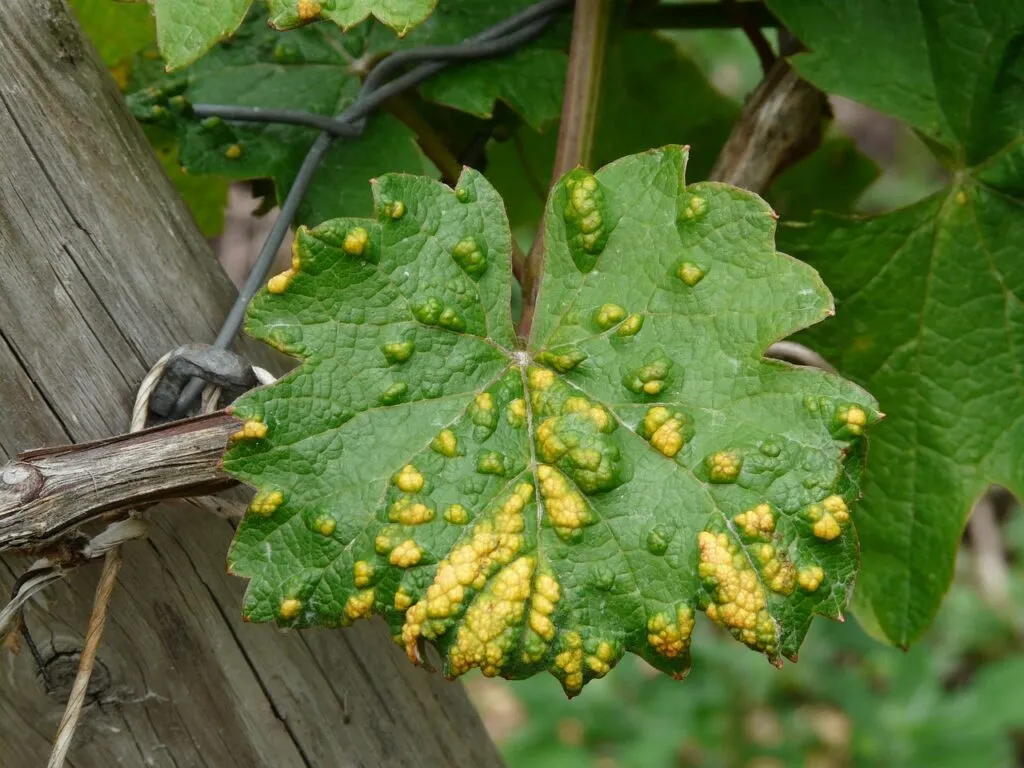



**<font color='red'>Question:</font>** What disease does this leaf have? Please provide a clear diagnosis.


**<font color='green'>Answer:</font>** **Esca**

This leaf shows symptoms consistent with Esca, a fungal disease affecting grapevines. The yellow, swollen, and often dead areas on the leaf are characteristic of Esca infection. 

**Note:** Esca is a serious disease that can weaken or kill grapevines. 





In [23]:
from gtts import gTTS
import IPython.display as ipd
import tempfile
from PIL import Image  
from IPython.display import display
# from langdetect import detect

image = Image.open(image_path)

display(image)

def run_image_query_audio(image_path, question_text, max_new_tokens=256, model=model, tokenizer=tokenizer):
    start = time()

    messages = [
        {
            "role": "system",
            "content": [
                {"type": "text", "text": "Answer briefly, be laconic if possible."}
            ]
        },
        {
            "role": "user",
            "content": [
                {"type": "image", "image": image_path},
                {"type": "text", "text": question_text}
            ]
        }
    ]

    output = do_gemma_3n_inference(model, tokenizer, messages, max_new_tokens=max_new_tokens)

    end = time()
    elapsed = np.round(end - start, 2)

    formatted_output = f"Question: {question_text}\nAnswer: {output}"
    display(Markdown(colorize_text(formatted_output)))

    tts = gTTS(output, lang='en')

    with tempfile.NamedTemporaryFile(suffix=".mp3") as fp:
        tts.save(fp.name)
        return ipd.Audio(fp.name, autoplay=True)

audio_player = run_image_query_audio(image_path, "What disease does this leaf have? Please provide a clear diagnosis.")
display(audio_player)

Multi Language

###

In [24]:
audio_player = run_image_query_audio(image_path, "ఈ ఆకు ఏ రకమైన వ్యాధితో ఉంది? దయచేసి స్పష్టమైన నిర్ధారణను ఇవ్వండి." )
display(audio_player)



**<font color='red'>Question:</font>** ఈ ఆకు ఏ రకమైన వ్యాధితో ఉంది? దయచేసి స్పష్టమైన నిర్ధారణను ఇవ్వండి.


**<font color='green'>Answer:</font>** ఈ ఆకుకు **వైరస్ వ్యాధి** ఉంది.

Fine-tuning this gemma model on diseased leaves dataset would make this model further better